In [875]:
#manipulation data libraries
import pandas as pd
import numpy as np
#visualiation data libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, plot_confusion_matrix
import tensorflow as tf
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from keras.optimizers import Adamax

In [876]:
#set default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [877]:
#import the dataset
dataLabelled = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep=",", header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','diagnosis'])
print(dataLabelled.dtypes)

id                              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
diagnosis                       int64
dtype: object


In [878]:
#drop the 16 instances where bare_nuclei has a "?" as a value
#the total value of instances is now 683
dataLabelled.drop(dataLabelled[(dataLabelled['bare_nuclei'] == '?')].index, inplace=True)

In [879]:
#check the data types and entries
dataLabelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           683 non-null    int64 
 1   clump_thickness              683 non-null    int64 
 2   uniformity_of_cell_size      683 non-null    int64 
 3   uniformity_of_cell_shape     683 non-null    int64 
 4   marginal_adhesion            683 non-null    int64 
 5   single_epithelial_cell_size  683 non-null    int64 
 6   bare_nuclei                  683 non-null    object
 7   bland_chromatin              683 non-null    int64 
 8   normal_nucleoli              683 non-null    int64 
 9   mitoses                      683 non-null    int64 
 10  diagnosis                    683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [880]:
print("")
print("Finding the mean of each column")

dataLabelled.mean()


Finding the mean of each column


id                             1.076720e+06
clump_thickness                4.442167e+00
uniformity_of_cell_size        3.150805e+00
uniformity_of_cell_shape       3.215227e+00
marginal_adhesion              2.830161e+00
single_epithelial_cell_size    3.234261e+00
bare_nuclei                             inf
bland_chromatin                3.445095e+00
normal_nucleoli                2.869693e+00
mitoses                        1.603221e+00
diagnosis                      2.699854e+00
dtype: float64

In [ ]:
#plotting material

In [881]:
#convert the bare_nuclei column from object type to a float64
dataLabelled['bare_nuclei'] = pd.to_numeric(dataLabelled['bare_nuclei'],errors='coerce')

In [882]:
#replace the 2 (benign ) and 4 (malignant) with 0 and 1
dataLabelled['diagnosis'].replace({2:0,4:1},inplace=True)

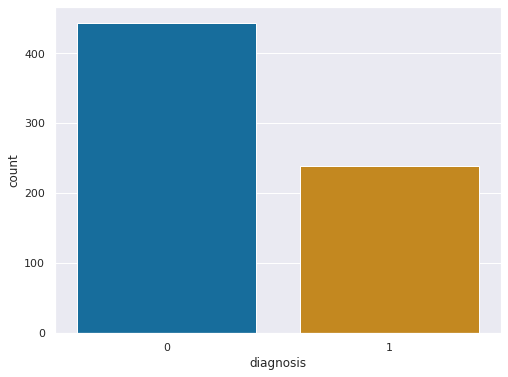

In [883]:
#plot the benign and malicious diagnosis 
plt.figure(figsize = (8,6))
sns.countplot(x = 'diagnosis', data = dataLabelled)

In [884]:
# drop the id columns
dataLabelled.drop('id',axis=1, inplace=True)
dataLabelled = dataLabelled.reset_index(drop=True)

In [885]:
dataLabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              683 non-null    int64
 1   uniformity_of_cell_size      683 non-null    int64
 2   uniformity_of_cell_shape     683 non-null    int64
 3   marginal_adhesion            683 non-null    int64
 4   single_epithelial_cell_size  683 non-null    int64
 5   bare_nuclei                  683 non-null    int64
 6   bland_chromatin              683 non-null    int64
 7   normal_nucleoli              683 non-null    int64
 8   mitoses                      683 non-null    int64
 9   diagnosis                    683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [886]:
#display the dataframe that will be used
dataLabelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland_chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
diagnosis,683.0,0.349927,0.477296,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Correlation Map')

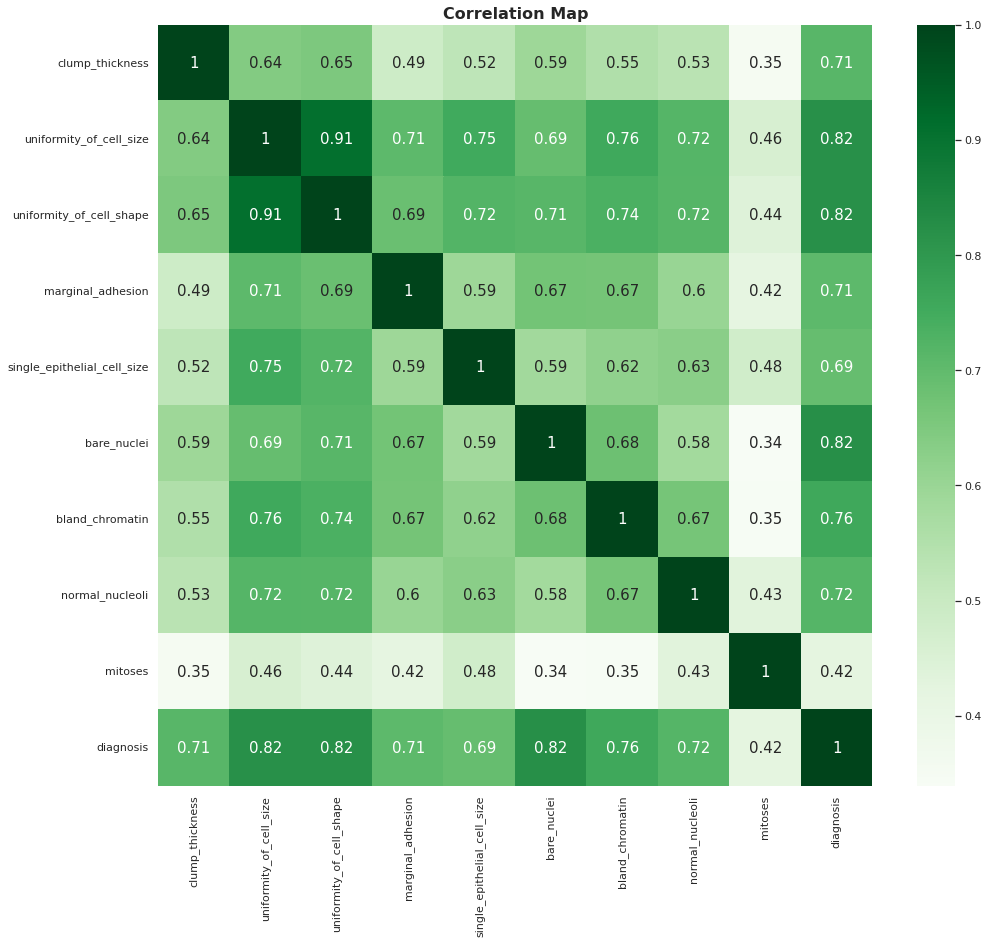

In [887]:
#create a confusion matrix to identify highly correlated features
plt.figure(figsize=(16,14))
sns.heatmap(dataLabelled.corr(), cmap='Greens', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [888]:
#define dependent (x) and independent (y) variables
x = dataLabelled.drop('diagnosis', axis=1)
y = dataLabelled['diagnosis']

In [889]:
#remove the two highly correlated features identified
dataLabelled.drop(columns='uniformity_of_cell_size',inplace=True)
dataLabelled.drop(columns='uniformity_of_cell_shape',inplace=True)
dataLabelled = dataLabelled.reset_index(drop=True)

In [890]:
#split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [891]:
# Scale the features using standardization
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
X_test = scaler.transform(x_test) 

In [892]:
#create the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [893]:
#create the model
def create_model():
    model = Sequential()
    model.add(Dense(units=30, kernel_initializer='uniform', activation='relu', input_shape=(9,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adamax(lr=0.002, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])
    return model

In [894]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, validation_data = (x_test, y_test))

<ipython-input-894-abb8bf45b3a2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, validation_data = (x_test, y_test))


In [895]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=20)

In [896]:
history = model.fit(x_train, y_train,batch_size = 32, validation_data=(x_test, y_test),epochs = 500,callbacks = [early_stopping])

Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 0.5112 - accuracy: 0.8013 - val_loss: 0.5835 - val_accuracy: 0.4927
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2611 - accuracy: 0.9289 - val_loss: 0.5299 - val_accuracy: 0.7415
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.9247 - val_loss: 0.4880 - val_accuracy: 0.8634
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2044 - accuracy: 0.9372 - val_loss: 0.4587 - val_accuracy: 0.9073
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.9310 - val_loss: 0.4400 - val_accuracy: 0.9073
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1828 - accuracy: 0.9623 - val_loss: 0.4248 - val_accuracy: 0.9073
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9351 - val_loss: 0.4190 - val_accuracy: 0.9024
Epoch 8/500
15/15 [=====

In [897]:
metrics = ('accuracy', 'roc_auc', 'precision', 'recall')
# Use cross_validation to perform 4-fold cross-validation
scores = cross_validate(model, x, y, cv=4, scoring=metrics)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


16/16 [==============================] - 1s 17ms/step - loss: 0.6618 - accuracy: 0.6895 - val_loss: 0.5881 - val_accuracy: 0.7024
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.8027 - val_loss: 0.5166 - val_accuracy: 0.8585
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3524 - accuracy: 0.8594 - val_loss: 0.4519 - val_accuracy: 0.9366
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.8965 - val_loss: 0.3955 - val_accuracy: 0.9707
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.9121 - val_loss: 0.3457 - val_accuracy: 0.9756
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2513 - accuracy: 0.9258 - val_loss: 0.3034 - val_accuracy: 0.9756
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.9355 - val_loss: 0.2711 - val_accuracy: 0.9756
Epoch 8/100
16/16 [=====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


16/16 [==============================] - 1s 16ms/step - loss: 0.6926 - accuracy: 0.6387 - val_loss: 0.6130 - val_accuracy: 0.8146
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5242 - accuracy: 0.7656 - val_loss: 0.5588 - val_accuracy: 0.9073
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8496 - val_loss: 0.5084 - val_accuracy: 0.9268
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.8594 - val_loss: 0.4611 - val_accuracy: 0.9317
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2729 - accuracy: 0.9141 - val_loss: 0.4152 - val_accuracy: 0.9366
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.9258 - val_loss: 0.3681 - val_accuracy: 0.9512
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.9336 - val_loss: 0.3264 - val_accuracy: 0.9756
Epoch 8/100
16/16 [=====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


16/16 [==============================] - 1s 19ms/step - loss: 0.4582 - accuracy: 0.8008 - val_loss: 0.5704 - val_accuracy: 0.5561
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.8906 - val_loss: 0.4975 - val_accuracy: 0.8878
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.8750 - val_loss: 0.4300 - val_accuracy: 0.9366
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.8906 - val_loss: 0.3684 - val_accuracy: 0.9707
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2503 - accuracy: 0.9316 - val_loss: 0.3151 - val_accuracy: 0.9805
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.8828 - val_loss: 0.2695 - val_accuracy: 0.9805
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9316 - val_loss: 0.2281 - val_accuracy: 0.9805
Epoch 8/100
16/16 [=====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 15ms/step - loss: 0.8688 - accuracy: 0.5536 - val_loss: 0.5972 - val_accuracy: 0.8439
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.7836 - val_loss: 0.5392 - val_accuracy: 0.8195
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.8577 - val_loss: 0.4897 - val_accuracy: 0.8829
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3230 - accuracy: 0.8967 - val_loss: 0.4349 - val_accuracy: 0.9317
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8986 - val_loss: 0.3889 - val_accuracy: 0.9659
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.8967 - val_loss: 0.3535 - val_accuracy: 0.9756
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.8869 - val_loss: 0.3142 - val_accuracy: 0.9756
Epoch 8/100
17/17 [=====

In [898]:
for metric, score in scores.items():
  print(f"{metric}: {score}")

fit_time: [11.2170167  11.18144011 10.98470235  9.76174164]
score_time: [0.21732688 0.2147584  0.23134375 0.27214384]
test_accuracy: [0.94152047 0.94736842 0.97660819 1.        ]
test_roc_auc: [0.9933129  0.98727422 0.99781977 1.        ]
test_precision: [0.97058824 0.92134831 0.95348837 1.        ]
test_recall: [0.89189189 0.97619048 0.95348837 1.        ]


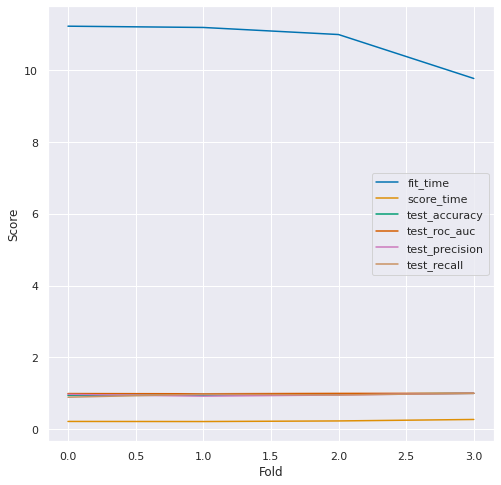

In [899]:
for metric, score in scores.items():
  plt.plot(score, label=metric)

plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.show()

In [900]:
# Extract the training and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [901]:
# Extract the training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

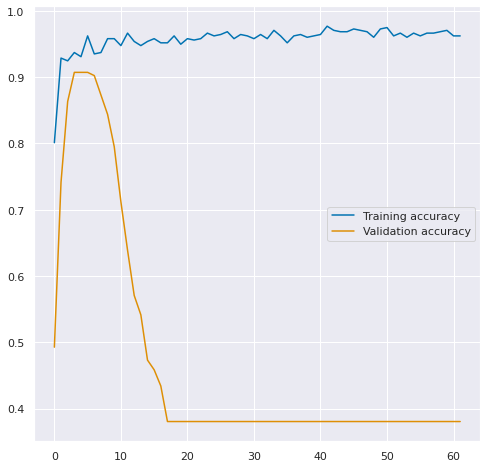

In [902]:
# Plot the training and validation accuracy
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.legend()
plt.show()

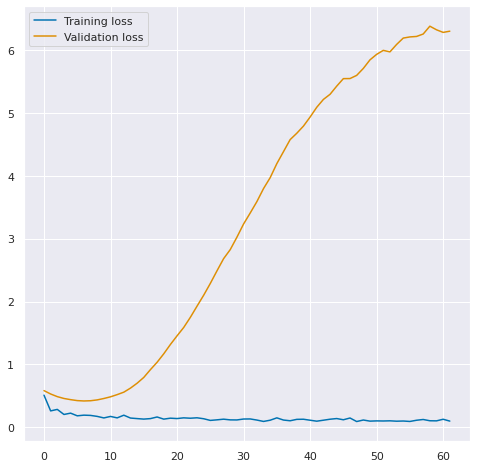

In [903]:
# Plot the training and validation loss
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()

In [904]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [905]:
# Calculate the confusion matrix, precision, and recall for the fold
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[  0 127]
 [  0  78]]
score is: 0.3804878048780488


In [906]:
confusion_matrices = []
precisions = []
recalls = []

In [907]:
# Store the scores for the fold
confusion_matrices.append(cm)
precisions.append(precision)
recalls.append(recall)

In [908]:
#calculate precision, recall and f1 score metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.38      1.00      0.55        78

    accuracy                           0.38       205
   macro avg       0.19      0.50      0.28       205
weighted avg       0.14      0.38      0.21       205



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


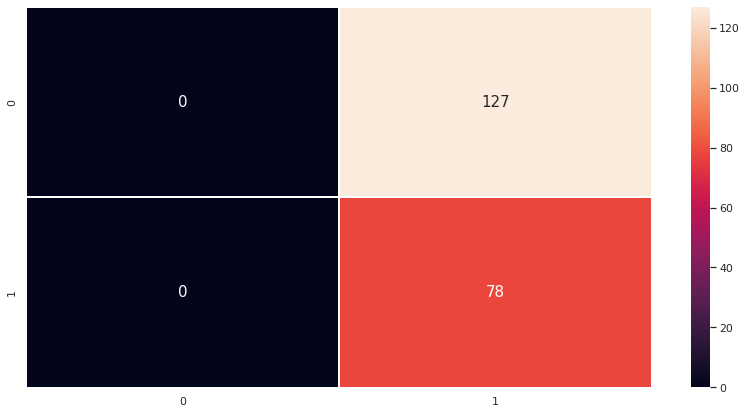

In [909]:
#create confussion matrix through heatmap
plt.figure(figsize=[14,7])
sns.heatmap(cm, annot=True, fmt="d", linewidth=.5)
plt.show()